# Facial Keypoint Detection
[참고 | Facial Keypoint Detection](https://www.kaggle.com/code/karanjakhar/facial-keypoint-detection)

- 3개의 CSV 파일
  - `training.csv` : 얼굴 부위의 키포인트 좌표
  - `test.csv` : `IdLookupTable.csv`의 3번째 데이터를 이용해, 좌표를 구해야하는 정보

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from IPython.display import clear_output
import time
import os
import pandas as pd

## Data Load

In [4]:
Train_Dir = "./FKD/training/training.csv"
Test_Dir = "./FKD/test/test.csv"
lookid_dir = "./FKD/IdLookupTable.csv"

train_data = pd.read_csv(Train_Dir)
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)

print(f"Train: {train_data.shape}\nTest: {test_data.shape}\nlookid: {lookid_data.shape}")

Train: (7049, 31)
Test: (1783, 2)
lookid: (27124, 4)


## EDA

In [6]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589
left_eye_inner_corner_y,39.647423,35.274349,36.320968,39.127179,39.621261
left_eye_outer_corner_x,73.130346,70.722723,70.984421,72.314713,72.515926
left_eye_outer_corner_y,39.969997,36.187166,36.320968,38.380967,39.884466
right_eye_inner_corner_x,36.356571,36.034723,37.678105,37.618643,36.98238
right_eye_inner_corner_y,37.389402,34.361532,36.320968,38.754115,39.094852


전치해서 샘플을 보는 방법이 신박..

### 결측치

In [11]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

28개의 컬럼에 결측치가 존재  

In [12]:
# 이전 행의 데이터를 이용해 결측치를 채움
train_data = train_data.fillna(method="ffill")

In [14]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

## Train Test Split

In [19]:
image = []
for idx in range(train_data.shape[0]):
    img = train_data["Image"][idx].split((" "))
    img = ["0" if x==" " else x for x in img]
    image.append(img)

In [20]:
image_list = np.array(image, dtype="float")
X_train = image_list.reshape(-1, 96, 96, 1)


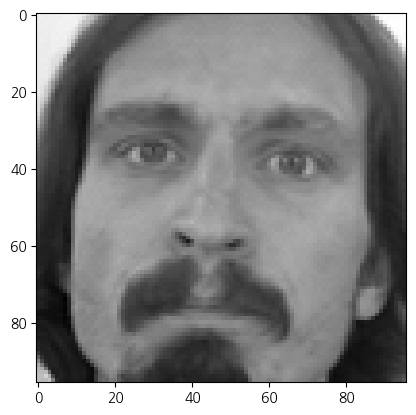

In [27]:
plt.imshow(X_train[0].reshape(96, 96), cmap="gray")
plt.show()

In [37]:
training = train_data.drop("Image", axis=1)

y_train = []
for idx in range(train_data.shape[0]):
    y = training.iloc[idx]
    y_train.append(y)

y_train = np.array(y_train, dtype="float")

In [38]:
print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}")

X_train: (7049, 96, 96, 1)
y_train: (7049, 30)


## Modeling
